In [ ]:
#Libraries
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from random import randint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, AvgPool2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

In [ ]:
#Load Data
img_gen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_loader=img_gen.flow_from_directory(
    directory="seg_train", target_size = (128, 128), batch_size = 50, seed=42
)

test_loader=img_gen.flow_from_directory(
    directory="seg_test", target_size = (128, 128), batch_size = 50, seed=42
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
train_loader.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
idx_to_classes = {val: key for key, val in train_loader.class_indices.items()}
idx_to_classes

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, AvgPool2D, BatchNormalization, Dropout, Flatten, Dense

model = Sequential()

# Convolution 1
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(128, 128, 3)))
model.add(AvgPool2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Convolution 2
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(AvgPool2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Flatten & Linear Fully Connected Layers
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(6, activation="softmax"))


In [ ]:
model.compile(optimizer="adam", loss= "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
train_steps = len(train_loader)
test_steps = len(test_loader)

In [ ]:
train_metrics = model.fit_generator(
    generator = train_loader,
    steps_per_epoch = train_steps,
    epochs = 20,
    validation_data = test_loader,
    validation_steps = test_steps
)

Epoch 1/20


C:\Users\Mohamed\AppData\Local\Temp\ipykernel_10976\3493931982.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train_metrics = model.fit_generator(




281/281 [==============================] - 38s 132ms/step - loss: 1.5970 - accuracy: 0.4813 - val_loss: 1.8275 - val_accuracy: 0.3310
Epoch 2/20
281/281 [==============================] - 39s 138ms/step - loss: 1.0754 - accuracy: 0.6064 - val_loss: 2.1798 - val_accuracy: 0.4560
Epoch 3/20
281/281 [==============================] - 39s 138ms/step - loss: 0.9361 - accuracy: 0.6563 - val_loss: 1.0012 - val_accuracy: 0.6503
Epoch 4/20
281/281 [==============================] - 38s 136ms/step - loss: 0.8297 - accuracy: 0.6917 - val_loss: 1.8872 - val_accuracy: 0.5120
Epoch 5/20
281/281 [==============================] - 38s 136ms/step - loss: 0.7547 - accuracy: 0.7165 - val_loss: 0.8492 - val_accuracy: 0.7093
Epoch 6/20
281/281 [==============================] - 38s 136ms/step - loss: 0.6904 - accuracy: 0.7429 - val_loss: 0.9036 - val_accuracy: 0.7097
Epoch 7/20
281/281 [==============================] - 38s 136ms/step - loss: 0.6621 - accuracy: 0.7550 - val_loss: 1.0590 - val_accuracy: 0

In [ ]:
#model performance
pred_list = [f"seg_pred/{i}" for i in os.listdir("seg_pred")]

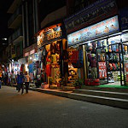

Model Prediction:  street


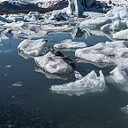

Model Prediction:  glacier


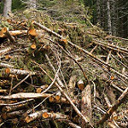

Model Prediction:  forest


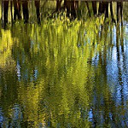

Model Prediction:  forest


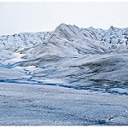

Model Prediction:  sea


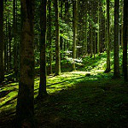

Model Prediction:  forest


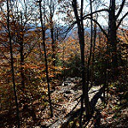

Model Prediction:  forest


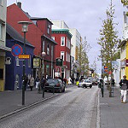

Model Prediction:  street


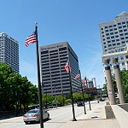

Model Prediction:  buildings


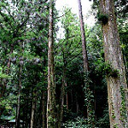

Model Prediction:  forest


In [ ]:
for i in range(10):
  num = randint(0, len(pred_list))
  img = Image.open(pred_list[num])
  img = img.resize((128, 128))
  display(img)
  img_arr = np.array(img)
  img_arr = img_arr[np.newaxis, :]
  img_arr = img_arr.astype("float")
  img_arr = img_gen.standardize(img_arr)
  probability = model(img_arr)
  pred = np.argmax(probability)
  print("Model Prediction: ",idx_to_classes[pred])
  print("==========================================")